In [1]:
import sys
sys.path.append('..')
from mp_api.client import MPRester
import numpy as np
from configs.silica import allegro
import tqdm
from matplotlib import pyplot as plt

/home/songk/anaconda3/envs/sh-net/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# query and download data
with MPRester("NA4RS6zGonPp3S3TQTSBPkzevjE3jAPt") as mpr:
    docs = mpr.summary.search(elements=["Si", "O"], num_elements=(2, 2))

/home/songk/anaconda3/envs/sh-net/lib/python3.10/site-packages/mp_api/client/mprester.py:227: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(
/tmp/ipykernel_3324071/3894061194.py:3: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(elements=["Si", "O"], num_elements=(2, 2))
Retrieving SummaryDoc documents: 100%|██████████| 344/344 [00:00<00:00, 3294156.57it/s]


In [3]:
docs[0].structure.to(fmt="cif")

"# generated using pymatgen\ndata_Si3O8\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.14301600\n_cell_length_b   10.40695400\n_cell_length_c   12.22505600\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Si3O8\n_chemical_formula_sum   'Si12 O32'\n_cell_volume   654.32327295\n_cell_formula_units_Z   4\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si0  1  0.86454300  0.42221100  0.48501600  1\n  Si  Si1  1  0.63545700  0.57778900  0.98501600  1\n  Si  Si2  1  0.36454300  0.07778900  0.51498400  1\n  Si  Si3  1  0.13545700  0.92221100  0.01498400  1\n  Si  Si4  1  0.28099500  0.79012600  0.56888000  1\n  Si  Si5  1  0.21900500  0.20987400  0.06888000  

(array([ 5.0387274, -0.       ,  0.       ]),
 array([ 0.        , 10.87461833, -2.51033772]),
 array([ 0.        ,  0.02721038, 11.16057258]))

In [4]:
num_atoms = []
num_neighbors_cutoff_25 = []
num_neighbors_cutoff_3 = []
for item in tqdm.tqdm(docs):
    num_atoms.append(item.nsites)
    ct_25 = 0
    ct_3 = 0
    for i in range(num_atoms[-1]):
        for j in range(num_atoms[-1]):
            if np.sqrt(np.sum((item.structure.cart_coords[i] - item.structure.cart_coords[j]) ** 2)) < 2.5:
                ct_25 += 1
            if np.sqrt(np.sum((item.structure.cart_coords[i] - item.structure.cart_coords[j]) ** 2)) < 3:
                ct_3 += 1
    num_neighbors_cutoff_25.append(ct_25 / num_atoms[-1])
    num_neighbors_cutoff_3.append(ct_3 / num_atoms[-1])

num_atoms = np.asarray(num_atoms)
num_neighbors_cutoff_25 = np.asarray(num_neighbors_cutoff_25)
num_neighbors_cutoff_3 = np.asarray(num_neighbors_cutoff_3)

100%|██████████| 344/344 [00:00<00:00, 376819.16it/s]


In [5]:
np.average(num_atoms)

62.73837209302326

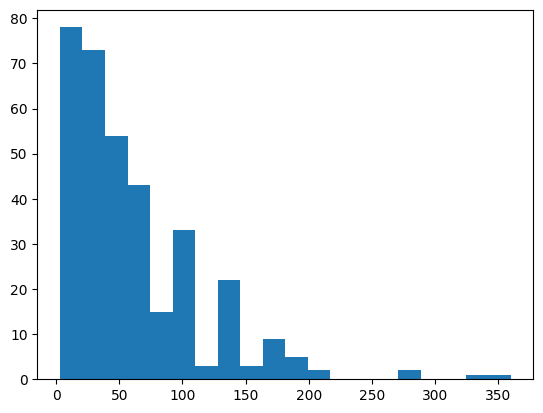

In [17]:
plt.hist(num_atoms, bins=20)
plt.show()

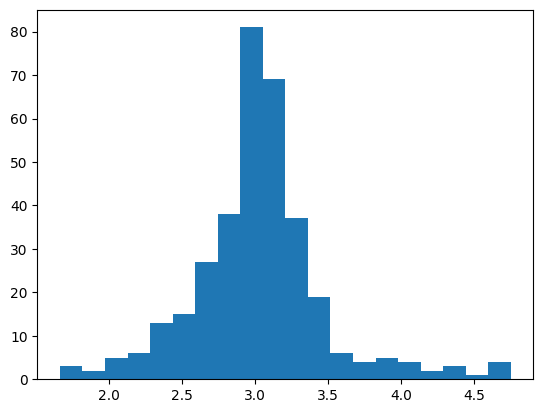

In [27]:
plt.hist(num_neighbors_cutoff_25, bins=20)
plt.show()

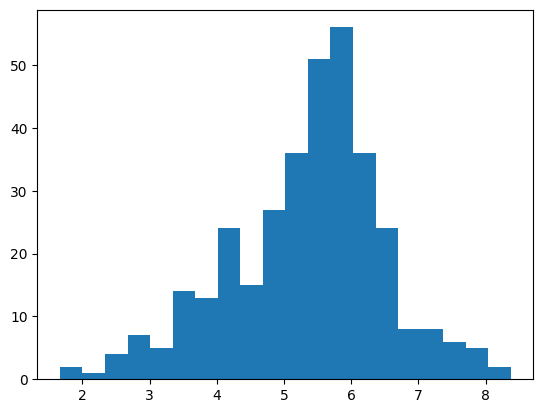

In [25]:
plt.hist(num_neighbors_cutoff_3, bins=20)
plt.show()

In [30]:
docs[5]

MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.38.6', pymatgen_version='2022.10.22', pull_request=825, database_version='2022.10.28', build_date=datetime.datetime(2022, 10, 28, 0, 53, 47, 823000)),
nsites=144,
elements=[Element O, Element Si],
nelements=2,
composition=Comp: Si48 O96,
composition_reduced=Comp: Si1 O2,
formula_pretty='SiO2',
formula_anonymous='AB2',
chemsys='O-Si',
volume=2537.830345237013,
density=1.8870732340619993,
density_atomic=17.6238218419237,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fm-3c', number=226, point_group='m-3m', symprec=0.1, version='1.16.2'),
property_name='summary',
material_id=MPID(mp-558931),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2022, 10, 28, 0, 53, 47, 824000),
origins=[],
warnings=[],
structure=Structure Summary
Lattice
    abc : 15.31061119486541 15.31061119486541 15.31061119486541
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 253